The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

## Import Libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
custom_palette=['orange','purple']   
sns.set_palette(custom_palette)
import tensorflow as tf

# Sklearn Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Utilities libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler

# Tensorflow Libraries
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Data explortation

In [34]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [35]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

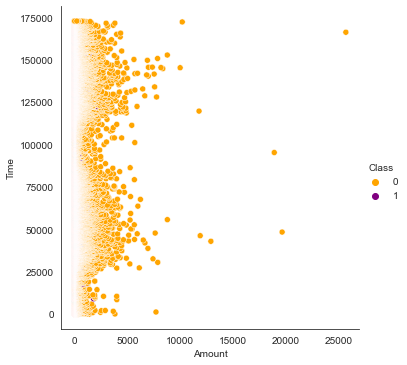

In [37]:
# Plotting graph to understand the relationship the variables
sns.relplot(x= 'Amount', y="Time", hue="Class",data=data)

We can infer that all the columns in dataset except the time and amount has already been normalized and we don't have any null values.

Number of normal transactions: 284315 that is 99.83% of dataset
Number of fraudulent transactions: 492 that is 0.17% of dataset



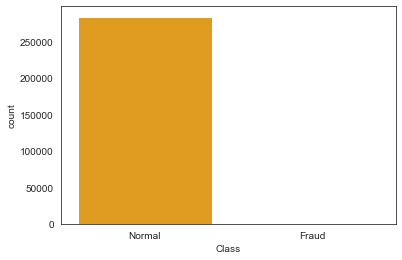

In [38]:
# Check the distribution of data
distribution = data.groupby(by=['Class']).size()
print("Number of normal transactions: {} that is {}% of dataset".format(distribution[0], 
                                                                        round(distribution[0] / len(data) * 100, 2)))
print("Number of fraudulent transactions: {} that is {}% of dataset\n".format(distribution[1], 
                                                                        round(distribution[1] / len(data) * 100, 2)))

ax = sns.countplot(data['Class'])
ax.set_xticklabels(['Normal', 'Fraud'])
plt.show()

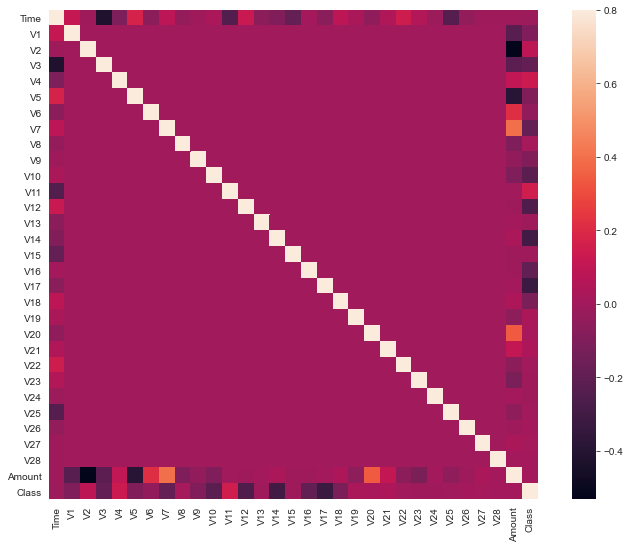

In [39]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize =(12,9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

We can see that the dataset is highly imbalanced and won't be useful for training directly. So, we'll have to sample few data points and then train our model.

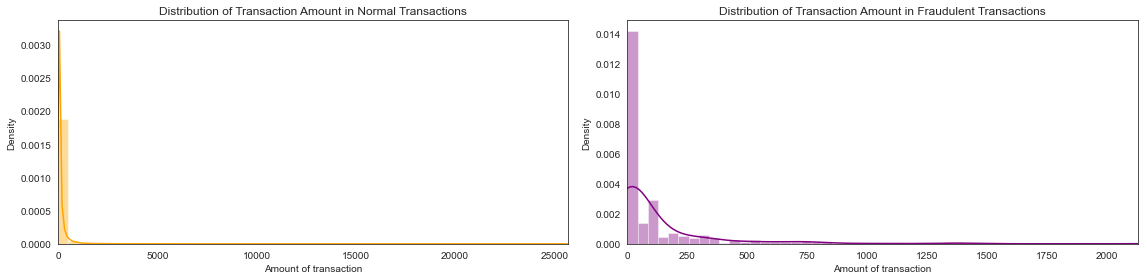

In [40]:
figure, ax = plt.subplots(1, 2, figsize=(16, 4))

amount_normal = data.loc[data['Class'] == 0]['Amount'].values
amount_fraud = data.loc[data['Class'] == 1]['Amount'].values

# Plot the distribution of amount in normal transactions
sns.distplot(amount_normal, ax=ax[0], color='orange')
ax[0].set_title('Distribution of Transaction Amount in Normal Transactions')
ax[0].set_xlabel('Amount of transaction')
ax[0].set_xlim([min(amount_normal), max(amount_normal)])

# Plot the distribution of amount in fraud transactions
sns.distplot(amount_fraud, ax=ax[1], color='purple')
ax[1].set_title('Distribution of Transaction Amount in Fraudulent Transactions')
ax[1].set_xlabel('Amount of transaction')
ax[1].set_xlim([min(amount_fraud), max(amount_fraud)])
plt.tight_layout()

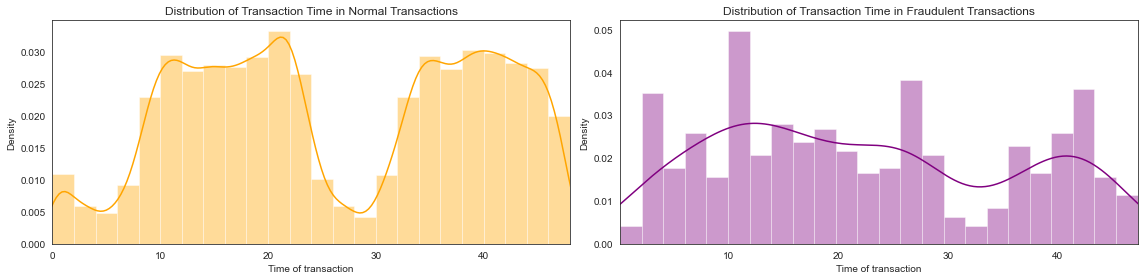

In [41]:
figure, ax = plt.subplots(1, 2, figsize=(16, 4))

time_normal = data.loc[data['Class'] == 0]['Time'].values / 3600
time_fraud = data.loc[data['Class'] == 1]['Time'].values / 3600

# Plot the distribution of time in normal transactions
sns.distplot(time_normal, ax=ax[0], color='orange', bins=24)
ax[0].set_title('Distribution of Transaction Time in Normal Transactions')
ax[0].set_xlabel('Time of transaction')
ax[0].set_xlim([min(time_normal), max(time_normal)])

# Plot the distribution of time in fraud transactions
sns.distplot(time_fraud, ax=ax[1], color='purple', bins=24)
ax[1].set_title('Distribution of Transaction Time in Fraudulent Transactions')
ax[1].set_xlabel('Time of transaction')
ax[1].set_xlim([min(time_fraud), max(time_fraud)])
plt.tight_layout()

### Undersampling the dataset

In [42]:

us = RandomUnderSampler(sampling_strategy = 0.80)
X_sub, y_sub = us.fit_resample(data.drop(['Class'], axis=1), data['Class'])

### Check the distributing of data after undersampling 

Number of normal transactions: 615 that is 55.56% of dataset
Number of fraudulent transactions: 492 that is 44.44% of dataset



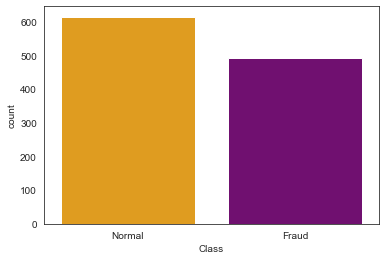

In [43]:
distribution = y_sub.value_counts()
print("Number of normal transactions: {} that is {}% of dataset".format(distribution[0], 
                                                                        round(distribution[0] / len(y_sub) * 100, 2)))
print("Number of fraudulent transactions: {} that is {}% of dataset\n".format(distribution[1], 
                                                                        round(distribution[1] / len(y_sub) * 100, 2)))

ax = sns.countplot(y_sub)
ax.set_xticklabels(['Normal', 'Fraud'])
plt.show()

### Divide the data into train and test samples

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.25, random_state=45)
print("The shape of training data is {}.".format(X_train.shape))
print("The shape of training data is {}.".format(X_test.shape))

The shape of training data is (830, 30).
The shape of training data is (277, 30).


In [45]:
# Scale the data (time and amount is not scaled)
sc = StandardScaler()
sc.fit(X_train)

# Transform the data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [46]:
# List of classifier we'll be using
classifiers = [
    ('LogisticRegression', LogisticRegression()),
    ('K-Nearest Neighbor', KNeighborsClassifier()),
    ('Support Vector Machine', SVC()),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier())
]

### Evaluate the model with default parameters first

In [47]:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    score = cross_val_score(classifier, X_train, y_train, cv=5)
    print(f'Accuracy score for {name}: {round(score.mean(), 2) * 100}%.')

Accuracy score for LogisticRegression: 94.0%.
Accuracy score for K-Nearest Neighbor: 92.0%.
Accuracy score for Support Vector Machine: 93.0%.
Accuracy score for Decision Tree Classifier: 93.0%.
Accuracy score for Random Forest Classifier: 94.0%.


## Hyper-parameter Tuning

In [48]:
# We'll use the Grid Search CV to find the best parameters

# Logistic Regression
logistic_regression_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10]}
grid_cv_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=logistic_regression_params)
grid_cv_lr.fit(X_train, y_train)
best_lr = grid_cv_lr.best_estimator_
best_lr_score = cross_val_score(best_lr, X_train, y_train, cv=5)
print(f'Accuracy score with best parameterized Logistic Regression: {round(best_lr_score.mean(), 2) * 100}%.')

# KNN
knn_params = {'n_neighbors': [2, 3, 4, 5], 'algorithm': ['auto', 'ball_tree', 'kd_tree']}
grid_cv_knn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params)
grid_cv_knn.fit(X_train, y_train)
best_knn = grid_cv_knn.best_estimator_
best_knn_score = cross_val_score(best_knn, X_train, y_train, cv=5)
print(f'Accuracy score with best parameterized KNN Classifier: {round(best_knn_score.mean(), 2) * 100}%.')

# Support Vector Machine Classifier
svc_params = {'kernel': ['rbf', 'poly', 'sigmoid', 'linear'], 'C': [0.5, 0.7, 0.9, 1]}
grid_cv_svc = GridSearchCV(estimator=SVC(), param_grid=svc_params)
grid_cv_svc.fit(X_train, y_train)
best_svc = grid_cv_svc.best_estimator_
best_svc_score = cross_val_score(best_svc, X_train, y_train, cv=5)
print(f'Accuracy score with best parameterized SVM Classifier: {round(best_svc_score.mean(), 2) * 100}%.')

# Decision Tree Classifier
decision_tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, 4, 5]}
grid_cv_tree = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=decision_tree_params)
grid_cv_tree.fit(X_train, y_train)
best_tree = grid_cv_tree.best_estimator_
best_tree_score = cross_val_score(best_tree, X_train, y_train, cv=5)
print(f'Accuracy score with best parameterized Decision Tree: {round(best_tree_score.mean(), 2) * 100}%.')

# Random Forest Classifier
random_forest_params = {'max_depth': [None, 80], 
                        'min_samples_leaf': [2, 3, 4], 
                        'n_estimators': [10, 20, 30],
                        'min_samples_split': [2, 4, 6]}
grid_cv_forest = GridSearchCV(estimator=RandomForestClassifier(), param_grid=random_forest_params)
grid_cv_forest.fit(X_train, y_train)
best_forest = grid_cv_forest.best_estimator_
best_forest_score = cross_val_score(best_forest, X_train, y_train, cv=5)
print(f'Accuracy score with best parameterized Random Forest: {round(best_forest_score.mean(), 2) * 100}%.')

Accuracy score with best parameterized Logistic Regression: 94.0%.
Accuracy score with best parameterized KNN Classifier: 94.0%.
Accuracy score with best parameterized SVM Classifier: 94.0%.
Accuracy score with best parameterized Decision Tree: 92.0%.
Accuracy score with best parameterized Random Forest: 94.0%.


In [49]:
# Here we'll see more metrics from all the models on the test data
y_pred_lr = best_lr.predict(X_test)
y_pred_knn = best_knn.predict(X_test)
y_pred_svc = best_svc.predict(X_test)
y_pred_tree = best_tree.predict(X_test)
y_pred_forest = best_forest.predict(X_test)

### Analysis of Logistic Regression

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       152
           1       0.91      0.96      0.93       125

    accuracy                           0.94       277
   macro avg       0.94      0.94      0.94       277
weighted avg       0.94      0.94      0.94       277



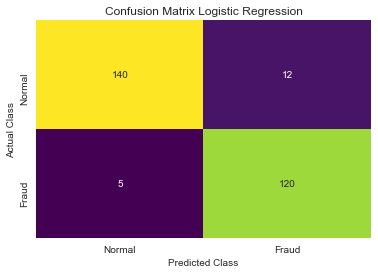

In [50]:
print(classification_report(y_pred_lr, y_test))
cf_matrix = confusion_matrix(y_pred_lr, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix Logistic Regression')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Analysis of K-Nearest Neighbors 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93       155
           1       0.89      0.96      0.92       122

    accuracy                           0.93       277
   macro avg       0.93      0.93      0.93       277
weighted avg       0.93      0.93      0.93       277



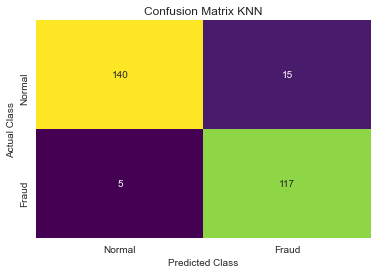

In [51]:
print(classification_report(y_pred_knn, y_test))
cf_matrix = confusion_matrix(y_pred_knn, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Analysis of Support Vector Machine

              precision    recall  f1-score   support

           0       0.97      0.92      0.94       154
           1       0.90      0.97      0.93       123

    accuracy                           0.94       277
   macro avg       0.94      0.94      0.94       277
weighted avg       0.94      0.94      0.94       277



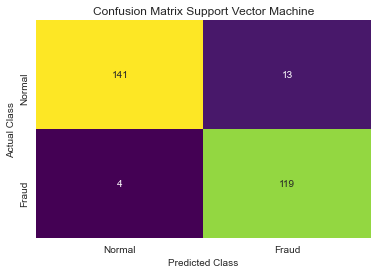

In [52]:
print(classification_report(y_pred_svc, y_test))
cf_matrix = confusion_matrix(y_pred_svc, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix Support Vector Machine')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Analysis of Random Forest Classifier 

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       153
           1       0.92      0.98      0.95       124

    accuracy                           0.95       277
   macro avg       0.95      0.95      0.95       277
weighted avg       0.95      0.95      0.95       277



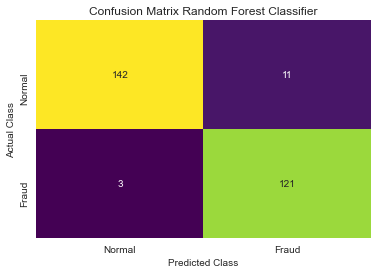

In [53]:
print(classification_report(y_pred_forest, y_test))
cf_matrix = confusion_matrix(y_pred_forest, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Analysis of Decision Tree Classifier 

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       145
           1       0.92      0.92      0.92       132

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277



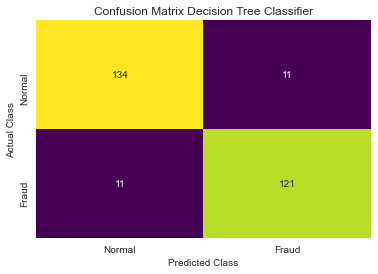

In [54]:
print(classification_report(y_pred_tree, y_test))
cf_matrix = confusion_matrix(y_pred_tree, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix Decision Tree Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### A simple Neural Network Model

In [55]:
def simple_neuralnet(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
    
    predictions = model.predict(X_test)
    predictions = predictions.round()
    return predictions

In [56]:
y_pred_nn = simple_neuralnet(X_train, y_train, X_test, y_test)

Epoch 1/50
52/52 [==============================] - 0s 7ms/step - loss: 0.4335 - accuracy: 0.8253 - val_loss: 0.2519 - val_accuracy: 0.9061
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9301 - val_loss: 0.2029 - val_accuracy: 0.9134
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 0.1924 - accuracy: 0.9386 - val_loss: 0.1842 - val_accuracy: 0.9314
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 0.1743 - accuracy: 0.9398 - val_loss: 0.1737 - val_accuracy: 0.9314
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 0.1525 - accuracy: 0.9422 - val_loss: 0.1808 - val_accuracy: 0.9350
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 0.1456 - accuracy: 0.9446 - val_loss: 0.1576 - val_accuracy: 0.9350
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 0.1340 - accuracy: 0.9542 - val_loss: 0.1646 - val_accuracy: 0.9350
Epoch 8/50
52/52 [==

The accuracy of simple neural network model is: 0.92
The precision of simple neural network model is: 0.92
The recall of simple neural network model is: 0.92
The f1 score of simple neural network model is: 0.92

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       146
         1.0       0.92      0.92      0.92       131

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277



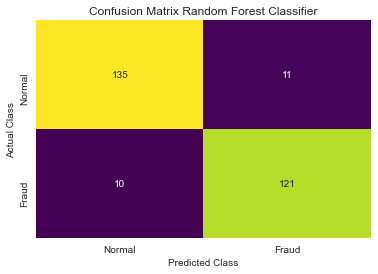

In [57]:
print(f'The accuracy of simple neural network model is: {round(accuracy_score(y_pred_nn, y_test), 2)}')
print(f'The precision of simple neural network model is: {round(precision_score(y_pred_nn, y_test), 2)}')
print(f'The recall of simple neural network model is: {round(recall_score(y_pred_nn, y_test), 2)}')
print(f'The f1 score of simple neural network model is: {round(f1_score(y_pred_nn, y_test), 2)}')
print()

# Analysis of Simple Neural Network
print(classification_report(y_pred_nn, y_test))
cf_matrix = confusion_matrix(y_pred_nn, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

### Deep Neural Network Model

In [58]:
def deep_neuralnet(X_train, y_train, X_test, y_test):
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))
    
    predictions = model.predict(X_test)
    predictions = predictions.round()
    return predictions

In [59]:
y_pred_deep = deep_neuralnet(X_train, y_train, X_test, y_test)

Epoch 1/50
52/52 [==============================] - 1s 17ms/step - loss: 0.3496 - accuracy: 0.9084 - val_loss: 0.1851 - val_accuracy: 0.9350
Epoch 2/50
52/52 [==============================] - 1s 11ms/step - loss: 0.1772 - accuracy: 0.9337 - val_loss: 0.1636 - val_accuracy: 0.9314
Epoch 3/50
52/52 [==============================] - 1s 11ms/step - loss: 0.1532 - accuracy: 0.9482 - val_loss: 0.1584 - val_accuracy: 0.9458
Epoch 4/50
52/52 [==============================] - 1s 11ms/step - loss: 0.1583 - accuracy: 0.9422 - val_loss: 0.1547 - val_accuracy: 0.9495
Epoch 5/50
52/52 [==============================] - 1s 12ms/step - loss: 0.1191 - accuracy: 0.9602 - val_loss: 0.1444 - val_accuracy: 0.9495
Epoch 6/50
52/52 [==============================] - 1s 11ms/step - loss: 0.1659 - accuracy: 0.9639 - val_loss: 0.1839 - val_accuracy: 0.9458
Epoch 7/50
52/52 [==============================] - 1s 11ms/step - loss: 0.0978 - accuracy: 0.9699 - val_loss: 0.1987 - val_accuracy: 0.9350
Epoch 8/50
52

The accuracy of Deep neural network model is: 0.92
The precision of Deep neural network model is: 0.94
The recall of Deep neural network model is: 0.9
The f1 score of Deep neural network model is: 0.92

              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       139
         1.0       0.94      0.90      0.92       138

    accuracy                           0.92       277
   macro avg       0.92      0.92      0.92       277
weighted avg       0.92      0.92      0.92       277



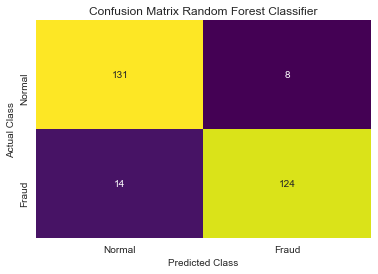

In [60]:
print(f'The accuracy of Deep neural network model is: {round(accuracy_score(y_pred_deep, y_test), 2)}')
print(f'The precision of Deep neural network model is: {round(precision_score(y_pred_deep, y_test), 2)}')
print(f'The recall of Deep neural network model is: {round(recall_score(y_pred_deep, y_test), 2)}')
print(f'The f1 score of Deep neural network model is: {round(f1_score(y_pred_deep, y_test), 2)}')
print()

# Analysis of Deep Neural Network
print(classification_report(y_pred_deep, y_test))
cf_matrix = confusion_matrix(y_pred_deep, y_test)
cf_dataframe = pd.DataFrame(cf_matrix, index=['Normal', 'Fraud'], columns=['Normal', 'Fraud'])

sns.heatmap(cf_dataframe, annot=True, fmt='g', cmap='viridis', cbar=None)
plt.title('Confusion Matrix Random Forest Classifier')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()